In [29]:
import pandas as pd
from generate_features import generate_features
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
from datetime import timedelta
from decimal import Decimal

# Generate Features

In [2]:
usd_eur = pd.read_csv("./USDEUR=X.csv", parse_dates=['Date'])
usd_gbp = pd.read_csv("./USDGBP=X.csv", parse_dates=['Date'])
usd_chf = pd.read_csv("./USDCHF=X.csv", parse_dates=['Date'])
eur_gbp = pd.read_csv("./EURGBP=X.csv", parse_dates=['Date'])
eur_chf = pd.read_csv("./EURCHF=X.csv", parse_dates=['Date'])
gbp_chf = pd.read_csv("./GBPCHF=X.csv", parse_dates=['Date'])
print(f"USD/EUR: {usd_eur.shape}")
display(usd_eur.head())
print(f"USD/GBP: {usd_gbp.shape}")
display(usd_gbp.head())
print(f"USD/CHF: {usd_chf.shape}")
display(usd_chf.head())
print(f"EUR/GBP: {eur_gbp.shape}")
display(eur_gbp.head())
print(f"EUR/CHF: {eur_chf.shape}")
display(eur_chf.head())
print(f"GBP/CHF: {gbp_chf.shape}")
display(gbp_chf.head())

USD/EUR: (285, 7)


/var/folders/14/_dygzhgd46bdd1k_9bk8qs6h0000gn/T/ipykernel_89416/2174889806.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eur_gbp = pd.read_csv("./EURGBP=X.csv", parse_dates=['Date'])
/var/folders/14/_dygzhgd46bdd1k_9bk8qs6h0000gn/T/ipykernel_89416/2174889806.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eur_chf = pd.read_csv("./EURCHF=X.csv", parse_dates=['Date'])


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,1.02117,1.02526,1.01582,1.02117,1.02117,0
1,2022-10-04,1.01708,1.01971,1.00199,1.01708,1.01708,0
2,2022-10-05,1.00157,1.01673,1.00058,1.00157,1.00157,0
3,2022-10-06,1.00898,1.02152,1.00742,1.00898,1.00898,0
4,2022-10-07,1.02155,1.02757,1.01874,1.02155,1.02155,0


USD/GBP: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,0.89795,0.90188,0.88243,0.89762,0.89762,0
1,2022-10-04,0.88186,0.88635,0.87367,0.88229,0.88229,0
2,2022-10-05,0.87332,0.89065,0.86995,0.87326,0.87326,0
3,2022-10-06,0.88060,0.89925,0.87847,0.88064,0.88064,0
4,2022-10-07,0.89564,0.90155,0.89097,0.89589,0.89589,0


USD/CHF: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,0.98565,0.99314,0.98351,0.98565,0.98565,0
1,2022-10-04,0.99256,0.99408,0.97948,0.99256,0.99256,0
2,2022-10-05,0.97869,0.98883,0.97844,0.97869,0.97869,0
3,2022-10-06,0.98132,0.99133,0.97790,0.98132,0.98132,0
4,2022-10-07,0.98997,0.99492,0.98790,0.98997,0.98997,0


EUR/GBP: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,0.87895,0.88302,0.86776,0.87895,0.87895,0
1,2022-10-04,0.86740,0.87415,0.86506,0.86740,0.86740,0
2,2022-10-05,0.87183,0.87761,0.86945,0.87183,0.87183,0
3,2022-10-06,0.87252,0.88144,0.87175,0.87252,0.87252,0
4,2022-10-07,0.87692,0.88065,0.87362,0.87692,0.87692,0


EUR/CHF: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,0.96513,0.97646,0.96430,0.96513,0.96513,0
1,2022-10-04,0.97578,0.97984,0.97390,0.97578,0.97578,0
2,2022-10-05,0.97714,0.97961,0.97043,0.97714,0.97714,0
3,2022-10-06,0.97264,0.97379,0.96920,0.97264,0.97264,0
4,2022-10-07,0.96909,0.97137,0.96770,0.96909,0.96909,0


GBP/CHF: (285, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,1.09778,1.12295,1.09302,1.09778,1.09778,0
1,2022-10-04,1.12474,1.12827,1.11793,1.12474,1.12474,0
2,2022-10-05,1.12057,1.12641,1.10700,1.12057,1.12057,0
3,2022-10-06,1.11404,1.11585,1.10107,1.11404,1.11404,0
4,2022-10-07,1.10497,1.11150,1.10139,1.10497,1.10497,0


In [3]:
usd_eur_feats = generate_features(usd_eur)
print(f"USD/EUR Features shape: {usd_eur_feats.shape}")
display(usd_eur_feats.head())

usd_gbp_feats = generate_features(usd_gbp)
print(f"USD/GBP Features shape: {usd_gbp_feats.shape}")
display(usd_gbp_feats.head())

usd_chf_feats = generate_features(usd_chf)
print(f"USD/CHF Features shape: {usd_chf_feats.shape}")
display(usd_chf_feats.head())

eur_gbp_feats = generate_features(eur_gbp)
print(f"EUR/GBP Features shape: {eur_gbp_feats.shape}")
display(eur_gbp_feats.head())

eur_chf_feats = generate_features(eur_chf)
print(f"EUR/CHF Features shape: {eur_chf_feats.shape}")
display(eur_chf_feats.head())

gbp_chf_feats = generate_features(gbp_chf)
print(f"GBP/CHF Features shape: {gbp_chf_feats.shape}")
display(gbp_chf_feats.head())

USD/EUR Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.945199,0.996826,0.999919,-0.000297,0.946022,0.304323,0.939339,1.041137,0.303626,...,-44.808354,-58.111639,-64.826924,-4996.040203,47.614688,-10.622861,0.005220,0.004834,47.614688,0.94170
1,2023-11-02,0.945213,1.000000,1.000076,0.000419,0.945956,-0.187367,0.994166,0.263343,-0.188140,...,-10.041835,-21.770090,-53.061082,-6097.737760,51.275082,-0.483403,0.006265,0.006210,51.275082,0.94455
2,2023-11-01,0.945341,1.004797,0.999876,-0.000406,0.945648,0.048926,0.965734,3.364298,0.049675,...,82.678343,25.798779,-57.688552,-5459.928285,52.203439,2.113941,0.006301,0.006209,52.203439,0.94526
3,2023-10-31,0.944310,1.000000,1.000519,-0.004140,0.945214,-0.099145,0.925530,0.622941,0.099007,...,-54.787025,-499.185756,-75.719455,-5478.404035,48.284815,-9.476169,0.006006,0.005699,48.284815,0.94206
4,2023-10-30,0.943330,1.000000,0.999855,0.002468,0.945106,-0.002240,1.051819,-1.924680,0.003322,...,2.147863,40.325085,3.008271,-5451.325514,54.348908,7.278908,0.007211,0.007361,54.348908,0.94675


USD/GBP Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.823231,1.000000,0.999889,-0.000276,0.821025,-0.090204,1.152278,-0.040893,-0.088779,...,-15.026854,-50.165482,-7.078591,-4051.053097,51.687019,-2.674181,0.005467,0.004628,51.687019,0.82022
1,2023-11-02,0.823912,1.000000,0.999851,0.001898,0.820840,-0.253217,0.971210,0.676256,-0.254143,...,-31.940389,-55.247536,-41.193164,-5610.241052,52.602051,-0.170413,0.006338,0.005738,52.602051,0.82087
2,2023-11-01,0.824287,1.000000,1.000006,-0.001609,0.820350,0.413241,0.733807,0.923098,0.412546,...,16.925487,11.587914,-44.129581,-5596.422127,55.448772,7.610794,0.007209,0.006962,55.448772,0.82290
3,2023-10-31,0.822878,1.006293,1.000529,-0.003524,0.819682,0.205505,0.903351,3.659092,0.206214,...,-39.372760,-2418.833356,-48.260024,-4705.742770,54.410492,4.577080,0.007374,0.007279,54.410492,0.82198
4,2023-10-30,0.822007,1.000000,0.999801,0.001999,0.819226,0.155520,1.077127,0.540260,0.156274,...,21.557599,61.379625,149.349642,-4593.634588,59.337534,17.951895,0.008029,0.008395,59.337534,0.82551


USD/CHF Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.904123,1.000000,1.000192,-0.003185,0.905757,-0.002463,0.847476,-0.970467,0.002328,...,-4.994679,-40.999972,163.405304,-4219.522306,55.677407,14.462076,-0.011683,-0.009219,55.677407,0.90610
1,2023-11-02,0.901706,1.000000,1.000731,-0.003333,0.905607,0.171956,0.842223,0.863591,0.171473,...,62.853837,-44.558076,-22907.703488,-4222.041774,55.101292,12.912282,-0.012802,-0.010028,55.101292,0.90555
2,2023-11-01,0.898767,1.000000,1.000392,-0.003243,0.905264,0.045334,1.004624,0.513333,0.045235,...,-53.372982,-71.228831,-253.386768,-4202.573153,60.769001,29.190840,-0.014130,-0.011110,60.769001,0.90980
3,2023-10-31,0.896256,1.005198,1.000565,-0.003238,0.904894,0.144707,1.264574,0.374953,0.144814,...,2.400838,-44.141915,-1183.608191,-4367.036936,52.507979,7.281077,-0.018135,-0.016202,52.507979,0.90206
4,2023-10-30,0.894340,1.000000,1.000164,-0.000342,0.904763,-0.089329,1.134787,0.383870,-0.089446,...,-20.133411,-39.380663,1209.186156,-4711.806534,52.962893,8.609686,-0.019812,-0.018303,52.962893,0.90240


EUR/GBP Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.870947,1.000000,0.999947,-0.000017,0.867811,0.018762,1.019047,1.753470,0.018999,...,-114.192859,-264.160659,-104.256228,-7160.362363,56.730784,11.865286,0.000678,0.000122,56.730784,0.87077
1,2023-11-02,0.871637,0.992165,0.999788,0.001567,0.867625,-0.136646,1.061463,-2.174983,0.136790,...,-1125.427984,-163.979720,-68.067442,-7175.092313,52.854249,0.285988,0.000708,0.000127,52.854249,0.86897
2,2023-11-01,0.871884,0.989384,1.000117,-0.001315,0.867397,-0.170110,1.039275,0.790355,-0.170277,...,-91.707520,-73.665545,-104.017460,-7160.935194,57.447552,13.144303,0.001625,0.001469,57.447552,0.87070
3,2023-10-31,0.871353,1.000000,1.000087,0.000039,0.867143,-0.104112,1.040756,0.415116,-0.104586,...,36.935279,424.065073,-148.701592,-6661.832805,62.395395,27.615052,0.001993,0.002166,62.395395,0.87240
4,2023-10-30,0.871324,1.000000,0.999925,-0.000157,0.866737,0.358006,0.885720,0.250198,-0.357719,...,-1093.331617,-21653.631285,-132.259980,-7032.040940,61.489538,25.078593,0.001603,0.001854,61.489538,0.87190


EUR/CHF Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.956503,1.000000,1.000285,-0.003062,0.957474,0.385802,1.145791,0.286521,0.385317,...,-17.715395,-45.247741,4.763145,-4277.713016,58.312440,23.856903,-0.017820,-0.014858,58.312440,0.96188
1,2023-11-02,0.953924,1.002997,1.000698,-0.003977,0.957282,0.078015,1.023114,-0.520591,0.077515,...,26.256782,-38.147053,33.000932,-4615.128319,54.756242,15.132448,-0.019972,-0.016985,54.756242,0.95866
2,2023-11-01,0.950673,1.000000,1.000542,-0.003011,0.957335,-0.077785,1.052511,-2.536798,0.078484,...,-25.509306,-53.055016,13.928149,-4670.441112,60.369975,30.989510,-0.021410,-0.018125,60.369975,0.96244
3,2023-10-31,0.949086,1.000000,1.000065,0.000835,0.957217,0.586751,1.117589,-2.036250,0.587964,...,-18.544837,-26.839509,30.000779,-4758.585946,54.751880,17.681247,-0.025344,-0.022992,54.751880,0.95751
4,2023-10-30,0.948062,0.994804,1.000328,-0.002938,0.957260,0.070332,1.110559,-0.370303,0.069357,...,-13.142346,-23.355519,142.940802,-5352.808927,48.728160,2.592755,-0.028343,-0.026908,48.728160,0.95311


GBP/CHF Features shape: (263, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,1.098108,1.005885,1.000397,-0.003563,1.103094,0.067481,1.151525,0.725844,0.067604,...,-7.670248,-43.791936,71.708539,-3385.417666,54.088195,16.722381,-0.021694,-0.017577,54.088195,1.10454
1,2023-11-02,1.094268,1.197878,1.000891,-0.005396,1.103182,0.002068,1.096291,-1.226128,0.001052,...,13.133722,-48.110366,91.700888,-4095.250576,52.708517,13.327550,-0.024217,-0.020040,52.708517,1.10306
2,2023-11-01,1.090227,1.003856,1.000474,-0.001870,1.103421,0.074939,0.942275,0.544501,0.074901,...,-31.683935,-53.125802,69.952833,-3808.958122,55.032730,19.990483,-0.027019,-0.023028,55.032730,1.10530
3,2023-10-31,1.089054,1.000000,0.999972,0.000913,1.103692,-0.002345,1.226450,-3.643160,-0.001630,...,-14.780511,-19.996582,98.210978,-3594.346954,47.431895,1.605056,-0.032034,-0.029537,47.431895,1.09739
4,2023-10-30,1.087868,0.995689,1.000483,-0.003326,1.104269,0.569565,0.893366,3.565949,0.569302,...,-7.572093,-19.197176,369.827863,-3324.149442,42.490729,-10.956348,-0.034980,-0.033626,42.490729,1.09306


In [4]:
def train_test_split(df, num_days):
    df2 = df.copy(deep=False)
    X_test = df2.iloc[:5]
    X_test.set_index('Date', inplace=True)
    X_test = X_test.drop(columns=['t', 'Close'])
    y = df2[['Date', 'Close']]
    y.index = y['Date']
    y = y.drop(columns=['Date'])
    y = y.shift(periods=5).dropna()
    y.reset_index(inplace=True)
    df2 = df2.merge(y, how='inner', on='Date')
    df2 = df2.drop(columns=['Close_x'])
    df2.set_index('Date', inplace=True)
    X_train, X_val = df2[df2['t'] < df2['t'].max()-num_days], df2[df2['t'] >= df2['t'].max()-num_days]
    X_train = X_train.drop(columns=['t','Close_y'])
    X_val = X_val.drop(columns=['t','Close_y'])
    y_train, y_val = df2[df2['t'] < df2['t'].max()-num_days]['Close_y'], df2[df2['t'] >= df2['t'].max()-num_days]['Close_y']
    
    return [X_train, X_val, y_train, y_val, X_test]

In [5]:
def feature_selection(df):
    X = df.drop(columns=['Date', 't', 'Close'])
    bad_features = []
    for col in list(X.columns):
        r = np.corrcoef(X[col],df['Close'])

        if r[0,1] < 0.5:
            bad_features.append(col)
    
    return bad_features

In [47]:
usd_eur_feats.columns

Index(['Date', 'opt_sine_offset', 'opt_sine_amp', 'opt_sine_freq',
       'opt_sine_phase', 'opt_fourier_offset', 'opt_fourier_cosamp',
       'opt_fourier_cosfreq', 'opt_fourier_cosphase', 'opt_fourier_sinamp',
       'opt_fourier_sinfreq', 'opt_fourier_sinphase', 't', 'Slopes',
       'autocorrelation', 'pca', 'ica', 'mean_abs', 'ROC1', 'ROC5', 'ROC20',
       'WILLIAMS14', 'RSI14', 'CMO9', 'DEMA9', 'TEMA9', 'STOCH14', 'Close'],
      dtype='object')

In [6]:
usd_eur_selected_feats = usd_eur_feats.drop(columns=feature_selection(usd_eur_feats))
usd_gbp_selected_feats = usd_gbp_feats.drop(columns=feature_selection(usd_gbp_feats))
usd_chf_selected_feats = usd_chf_feats.drop(columns=feature_selection(usd_chf_feats))
eur_gbp_selected_feats = eur_gbp_feats.drop(columns=feature_selection(eur_gbp_feats))
eur_chf_selected_feats = eur_chf_feats.drop(columns=feature_selection(eur_chf_feats))
gbp_chf_selected_feats = gbp_chf_feats.drop(columns=feature_selection(gbp_chf_feats))

In [7]:
usd_eur_datasets = train_test_split(usd_eur_feats, 14)
usd_gbp_datasets = train_test_split(usd_gbp_feats, 14)
usd_chf_datasets = train_test_split(usd_chf_feats, 14)
eur_gbp_datasets = train_test_split(eur_gbp_feats, 14)
eur_chf_datasets = train_test_split(eur_chf_feats, 14)
gbp_chf_datasets = train_test_split(gbp_chf_feats, 14)

In [8]:
usd_eur_datasets_select = train_test_split(usd_eur_selected_feats, 14)
usd_gbp_datasets_select = train_test_split(usd_gbp_selected_feats, 14)
usd_chf_datasets_select = train_test_split(usd_chf_selected_feats, 14)
eur_gbp_datasets_select = train_test_split(eur_gbp_selected_feats, 14)
eur_chf_datasets_select = train_test_split(eur_chf_selected_feats, 14)
gbp_chf_datasets_select = train_test_split(gbp_chf_selected_feats, 14)

# Train Linear/Ridge Regression Models

In [9]:
def ridge_regression_grid_search(X_train, y_train, alphas):
    MSEs = np.zeros(alphas.shape)
    for i, a in enumerate(alphas):
        mdl = Ridge(alpha=a)
        scores = cross_val_score(mdl, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        MSEs[i] = np.mean(-scores)

    return MSEs

In [32]:
def ridge_regression_results_and_forecast(X_train, y_train, X_val, y_val, X_test, opt_alpha, forex_name):
    mdl = Ridge(alpha=opt_alpha)
    mdl.fit(X_train, y_train)
    y_train2 = pd.DataFrame(y_train.copy())
    y_train2.reset_index(inplace=True)
    y_train2['pred'] = mdl.predict(X_train)
    train_MSE = np.sum((y_train2['pred']-y_train2['Close_y'])**2)

    y_val2 = pd.DataFrame(y_val.copy())
    y_val2.reset_index(inplace=True)
    y_val2['pred'] = mdl.predict(X_val)
    test_MSE = np.sum((y_val2['pred']-y_val2['Close_y'])**2)

    plt.figure()
    plt.plot(y_train2['Date']+timedelta(days=7), y_train2['pred'], label='Prediction')
    plt.plot(y_train2['Date']+timedelta(days=7), y_train2['Close_y'], label='Close')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Close')
    plt.legend()
    plt.title(f'Training Set Predictions for {forex_name} Exchange Rate, MSE = %.4E' % Decimal(train_MSE))

    plt.figure()
    plt.plot(y_val2['Date']+timedelta(days=7), y_val2['pred'], label='Prediction')
    plt.plot(y_val2['Date']+timedelta(days=7), y_val2['Close_y'], label='Close')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Close')
    plt.legend()
    plt.title(f'Test Set Predictions for {forex_name} Exchange Rate, MSE = %.4E' % Decimal(test_MSE))

    
    forecast_vals = pd.DataFrame({'Date': X_test.index+timedelta(days=7), f'Predicted_Close_{forex_name}':mdl.predict(X_test)})
    return forecast_vals
    

Minimum CV MSE = 7.719334069338036e-05, best alpha = 0.01


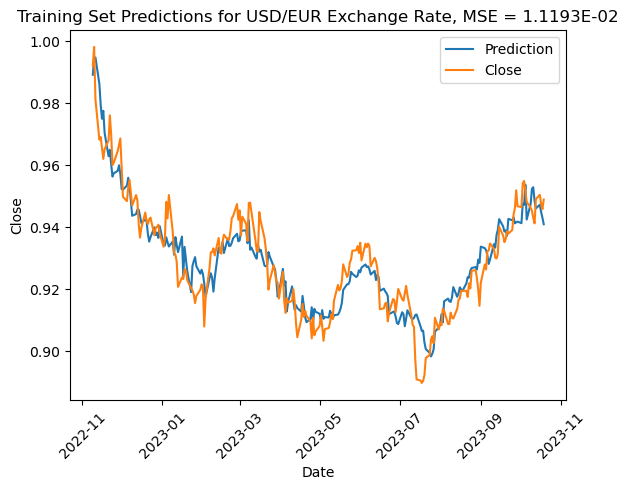

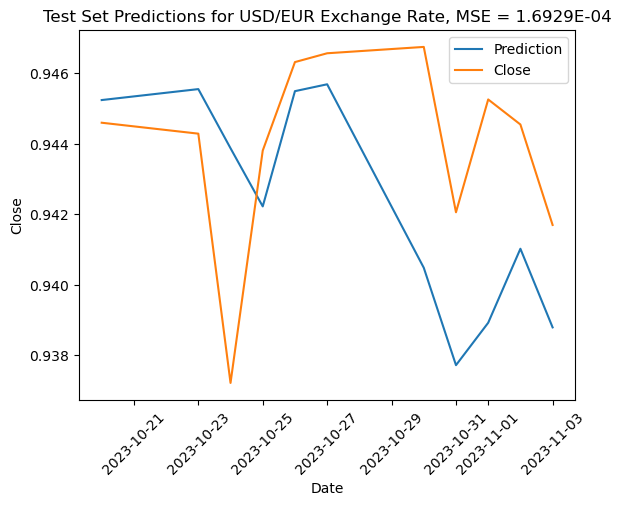

In [33]:
alphas = 10.0**np.arange(-5,6)
usd_eur_MSEs = ridge_regression_grid_search(usd_eur_datasets[0], usd_eur_datasets[2], alphas)
min_ind = np.argmin(usd_eur_MSEs)
print(f"Minimum CV MSE = {usd_eur_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
usd_eur_forecast_vals = ridge_regression_results_and_forecast(usd_eur_datasets[0], usd_eur_datasets[2], usd_eur_datasets[1], usd_eur_datasets[3], usd_eur_datasets[4], alphas[min_ind], "USD/EUR")

Minimum CV MSE = 0.0002198639260445479, best alpha = 0.1


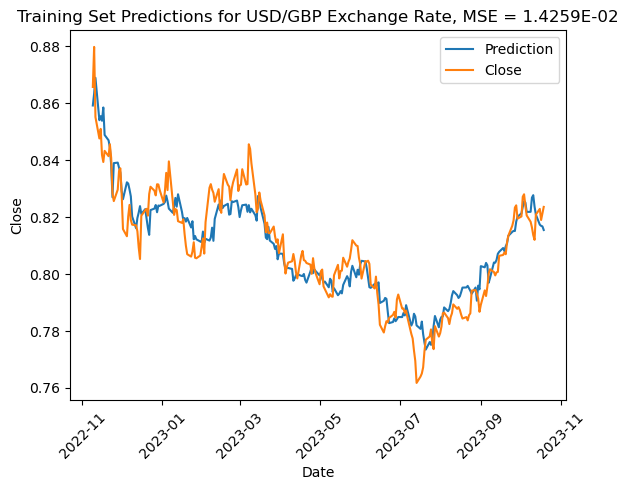

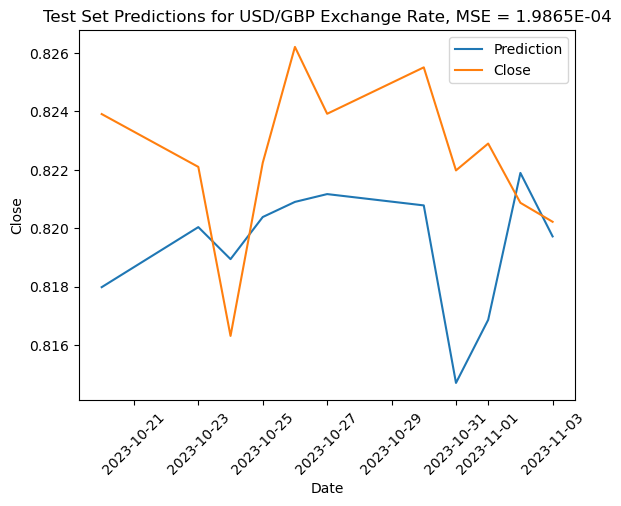

In [34]:
alphas = 10.0**np.arange(-5,6)
usd_gbp_MSEs = ridge_regression_grid_search(usd_gbp_datasets[0], usd_gbp_datasets[2], alphas)
min_ind = np.argmin(usd_gbp_MSEs)
print(f"Minimum CV MSE = {usd_gbp_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
usd_gbp_forecast_vals = ridge_regression_results_and_forecast(usd_gbp_datasets[0], usd_gbp_datasets[2], usd_gbp_datasets[1], usd_gbp_datasets[3], usd_gbp_datasets[4], alphas[min_ind], "USD/GBP")

Minimum CV MSE = 0.00020210723702832425, best alpha = 1e-05


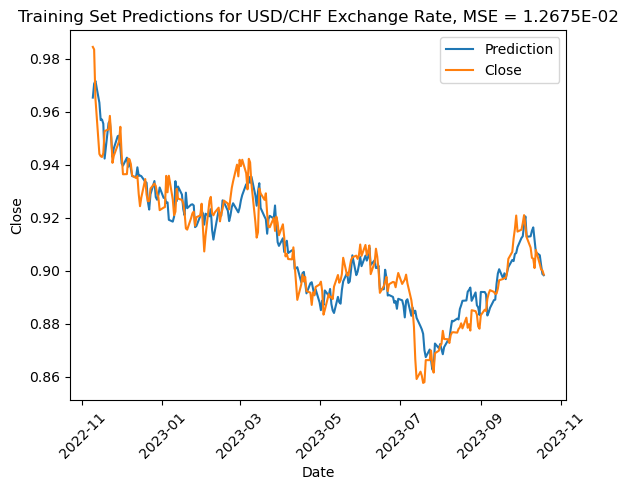

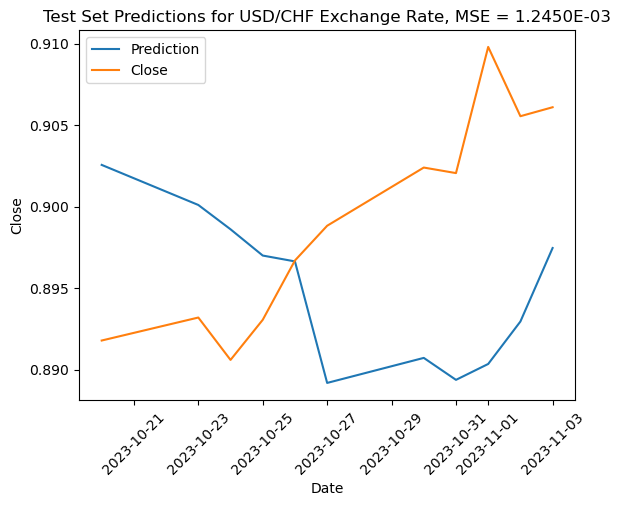

In [35]:
alphas = 10.0**np.arange(-5,6)
usd_chf_MSEs = ridge_regression_grid_search(usd_chf_datasets[0], usd_chf_datasets[2], alphas)
min_ind = np.argmin(usd_chf_MSEs)
print(f"Minimum CV MSE = {usd_chf_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
usd_chf_forecast_vals = ridge_regression_results_and_forecast(usd_chf_datasets[0], usd_chf_datasets[2], usd_chf_datasets[1], usd_chf_datasets[3], usd_chf_datasets[4], alphas[min_ind], "USD/CHF")

Minimum CV MSE = 5.271783176609183e-05, best alpha = 0.001


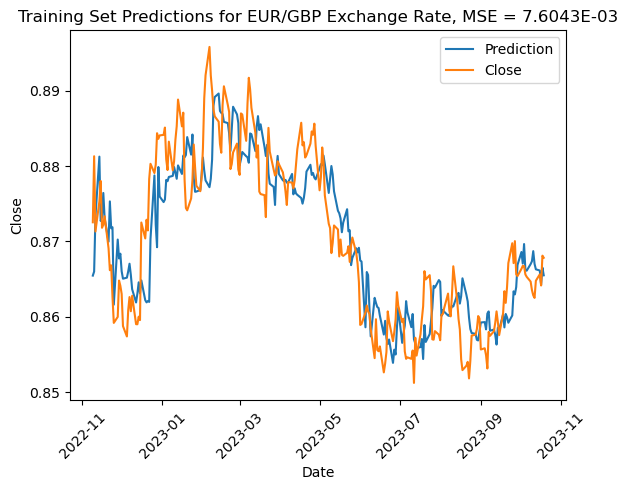

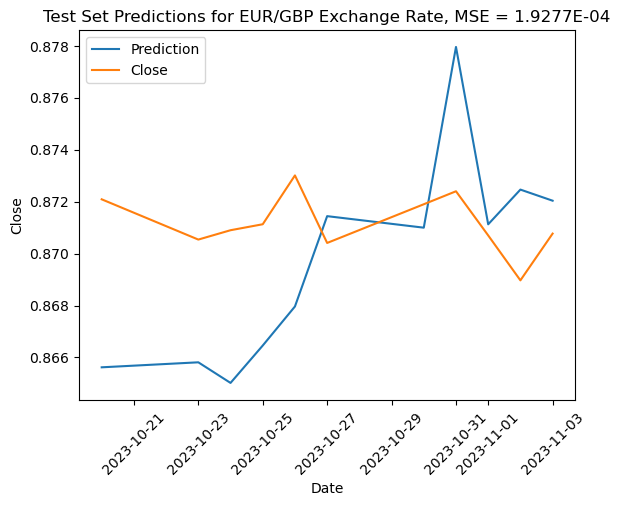

In [36]:
alphas = 10.0**np.arange(-5,6)
eur_gbp_MSEs = ridge_regression_grid_search(eur_gbp_datasets[0], eur_gbp_datasets[2], alphas)
min_ind = np.argmin(eur_gbp_MSEs)
print(f"Minimum CV MSE = {eur_gbp_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
eur_gbp_forecast_vals = ridge_regression_results_and_forecast(eur_gbp_datasets[0], eur_gbp_datasets[2], eur_gbp_datasets[1], eur_gbp_datasets[3], eur_gbp_datasets[4], alphas[min_ind], "EUR/GBP")

Minimum CV MSE = 4.3003922818170445e-05, best alpha = 0.01


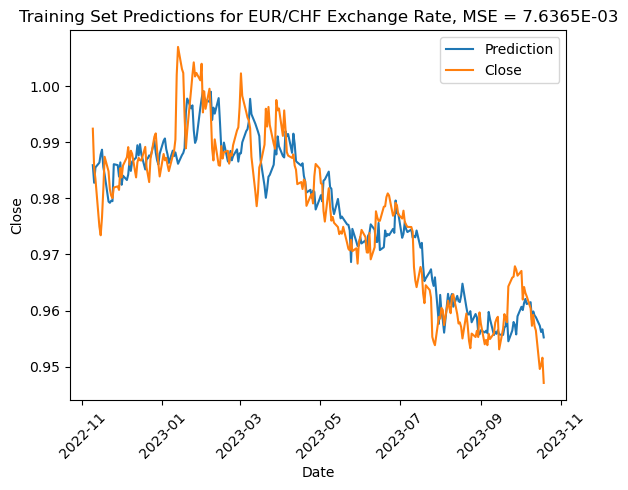

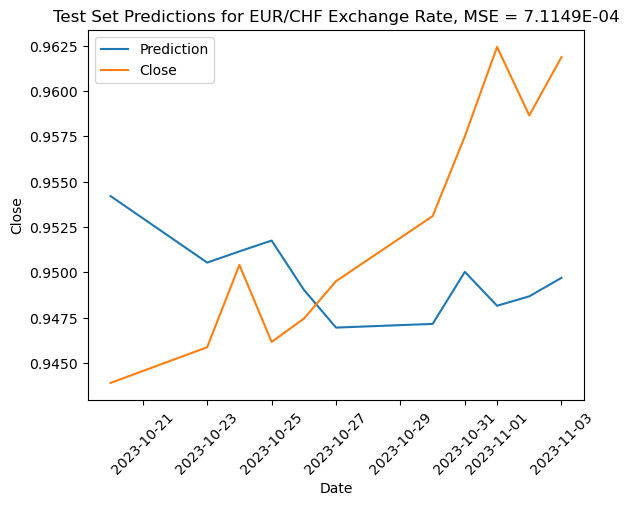

In [37]:
alphas = 10.0**np.arange(-5,6)
eur_chf_MSEs = ridge_regression_grid_search(eur_chf_datasets[0], eur_chf_datasets[2], alphas)
min_ind = np.argmin(eur_chf_MSEs)
print(f"Minimum CV MSE = {eur_chf_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
eur_chf_forecast_vals = ridge_regression_results_and_forecast(eur_chf_datasets[0], eur_chf_datasets[2], eur_chf_datasets[1], eur_chf_datasets[3], eur_chf_datasets[4], alphas[min_ind], "EUR/CHF")

Minimum CV MSE = 8.256063437919568e-05, best alpha = 1.0


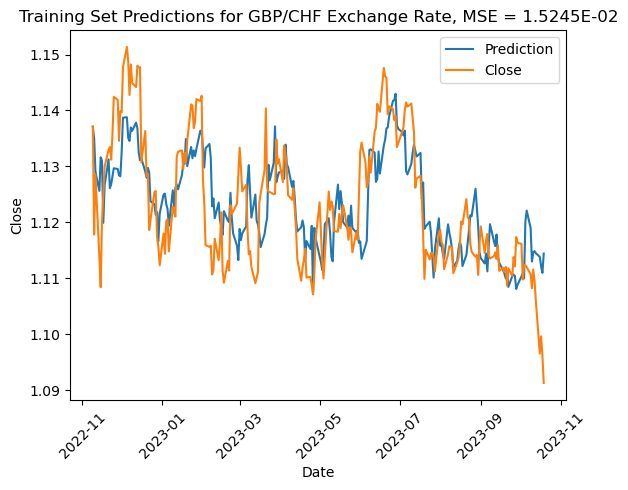

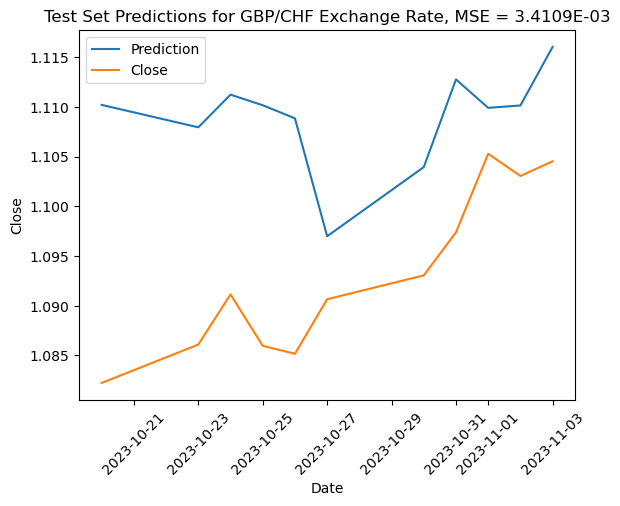

In [38]:
alphas = 10.0**np.arange(-5,6)
gbp_chf_MSEs = ridge_regression_grid_search(gbp_chf_datasets[0], gbp_chf_datasets[2], alphas)
min_ind = np.argmin(gbp_chf_MSEs)
print(f"Minimum CV MSE = {gbp_chf_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
gbp_chf_forecast_vals = ridge_regression_results_and_forecast(gbp_chf_datasets[0], gbp_chf_datasets[2], gbp_chf_datasets[1], gbp_chf_datasets[3], gbp_chf_datasets[4], alphas[min_ind], "GBP/CHF")

In [39]:
forecast_vals = usd_eur_forecast_vals.merge(eur_chf_forecast_vals, how='inner', on='Date')
lst = [eur_gbp_forecast_vals, gbp_chf_forecast_vals, usd_chf_forecast_vals, usd_gbp_forecast_vals]
for vals in lst:
    forecast_vals = forecast_vals.merge(vals, how='inner', on='Date')

forecast_vals

,Date,Predicted_Close_USD/EUR,Predicted_Close_EUR/CHF,Predicted_Close_EUR/GBP,Predicted_Close_GBP/CHF,Predicted_Close_USD/CHF,Predicted_Close_USD/GBP
0,2023-11-10,0.938224,0.956858,0.872528,1.126129,0.905710,0.819177
1,2023-11-09,0.939825,0.955053,0.872847,1.122646,0.908524,0.817239
2,2023-11-08,0.940245,0.957036,0.872161,1.124397,0.907773,0.814245
3,2023-11-07,0.936854,0.953612,0.872996,1.118644,0.901158,0.816482
4,2023-11-06,0.940314,0.951365,0.877467,1.118094,0.898954,0.821285


# Train Linear/Ridge Regression Models on Feature Selected Data

Minimum CV MSE = 5.7513457717678094e-05, best alpha = 0.01


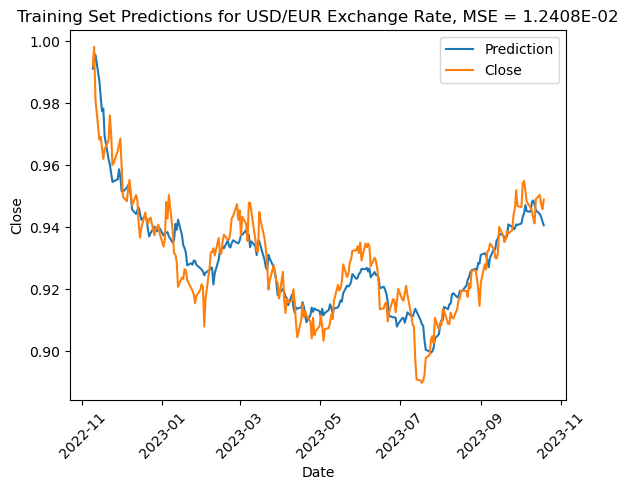

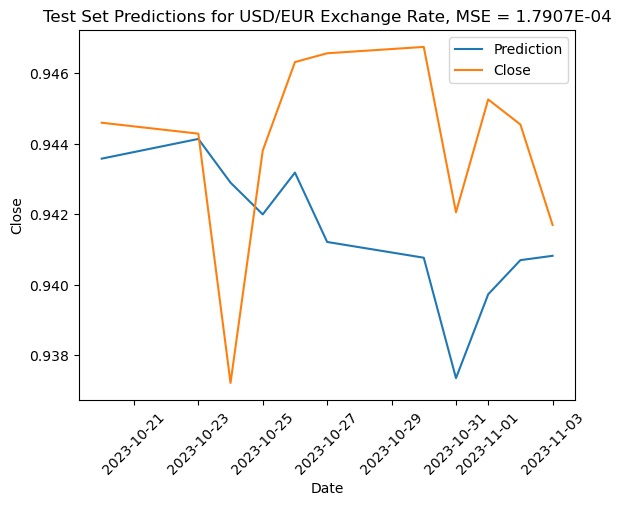

In [40]:
alphas = 10.0**np.arange(-5,6)
usd_eur_MSEs = ridge_regression_grid_search(usd_eur_datasets_select[0], usd_eur_datasets_select[2], alphas)
min_ind = np.argmin(usd_eur_MSEs)
print(f"Minimum CV MSE = {usd_eur_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
usd_eur_forecast_vals_select = ridge_regression_results_and_forecast(usd_eur_datasets_select[0], usd_eur_datasets_select[2], usd_eur_datasets_select[1], usd_eur_datasets_select[3], usd_eur_datasets_select[4], alphas[min_ind], "USD/EUR")

Minimum CV MSE = 0.00011099217125911392, best alpha = 0.01


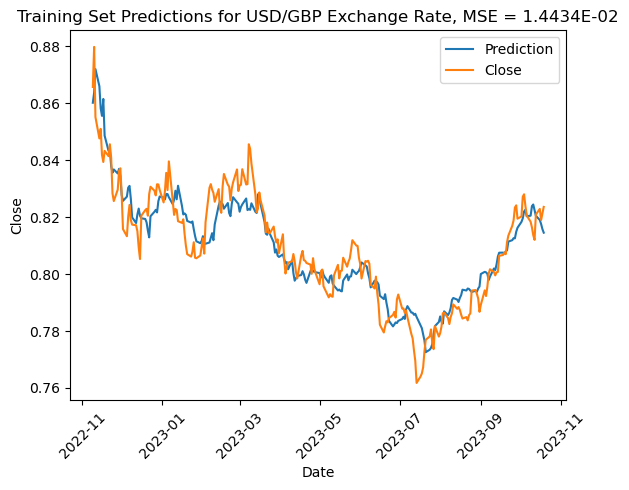

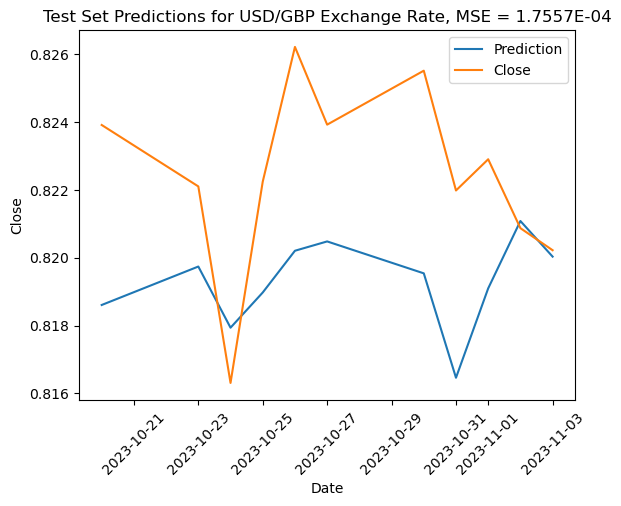

In [41]:
alphas = 10.0**np.arange(-5,6)
usd_gbp_MSEs = ridge_regression_grid_search(usd_gbp_datasets_select[0], usd_gbp_datasets_select[2], alphas)
min_ind = np.argmin(usd_gbp_MSEs)
print(f"Minimum CV MSE = {usd_gbp_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
usd_gbp_forecast_vals_select = ridge_regression_results_and_forecast(usd_gbp_datasets_select[0], usd_gbp_datasets_select[2], usd_gbp_datasets_select[1], usd_gbp_datasets_select[3], usd_gbp_datasets_select[4], alphas[min_ind], "USD/GBP")

Minimum CV MSE = 0.00011136120207456656, best alpha = 0.01


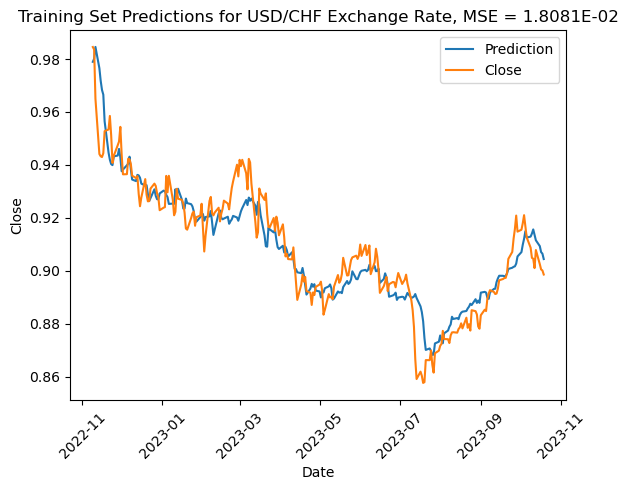

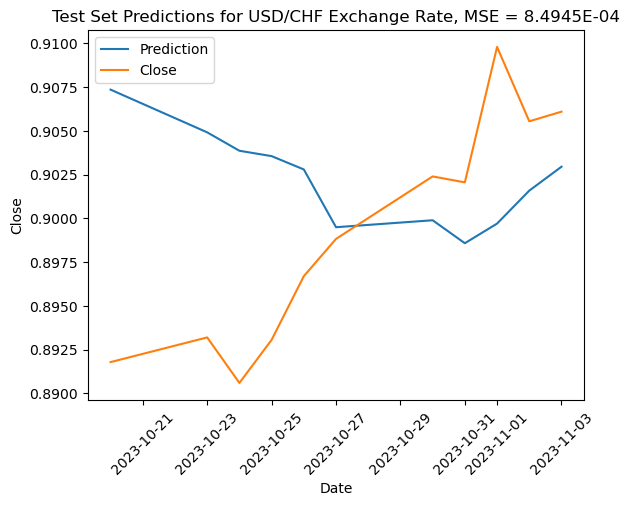

In [42]:
alphas = 10.0**np.arange(-5,6)
usd_chf_MSEs = ridge_regression_grid_search(usd_chf_datasets_select[0], usd_chf_datasets_select[2], alphas)
min_ind = np.argmin(usd_chf_MSEs)
print(f"Minimum CV MSE = {usd_chf_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
usd_chf_forecast_vals_select = ridge_regression_results_and_forecast(usd_chf_datasets_select[0], usd_chf_datasets_select[2], usd_chf_datasets_select[1], usd_chf_datasets_select[3], usd_chf_datasets_select[4], alphas[min_ind], "USD/CHF")

Minimum CV MSE = 3.8344352715312724e-05, best alpha = 0.01


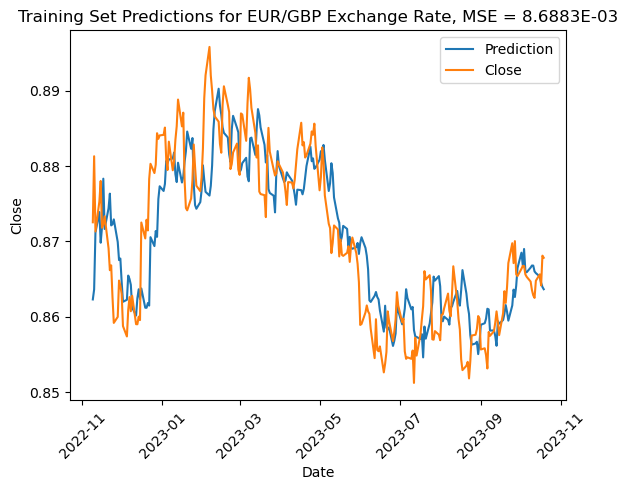

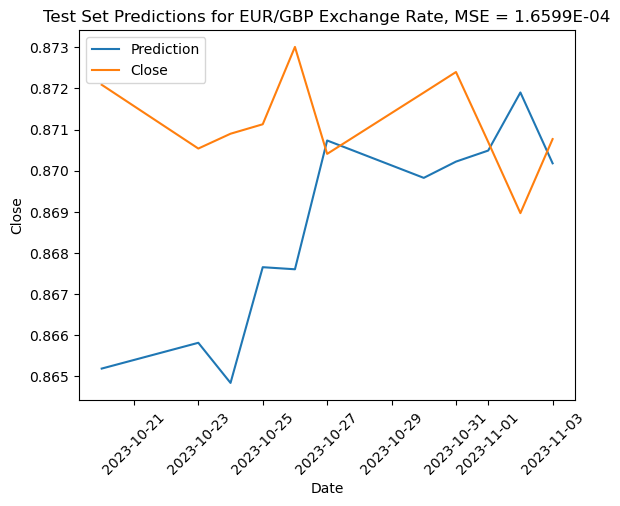

In [43]:
alphas = 10.0**np.arange(-5,6)
eur_gbp_MSEs = ridge_regression_grid_search(eur_gbp_datasets_select[0], eur_gbp_datasets_select[2], alphas)
min_ind = np.argmin(eur_gbp_MSEs)
print(f"Minimum CV MSE = {eur_gbp_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
eur_gbp_forecast_vals_select = ridge_regression_results_and_forecast(eur_gbp_datasets_select[0], eur_gbp_datasets_select[2], eur_gbp_datasets_select[1], eur_gbp_datasets_select[3], eur_gbp_datasets_select[4], alphas[min_ind], "EUR/GBP")

Minimum CV MSE = 3.56417365296751e-05, best alpha = 0.0001


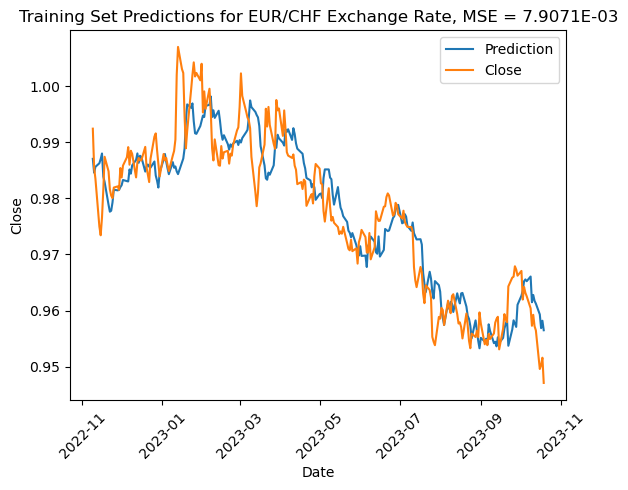

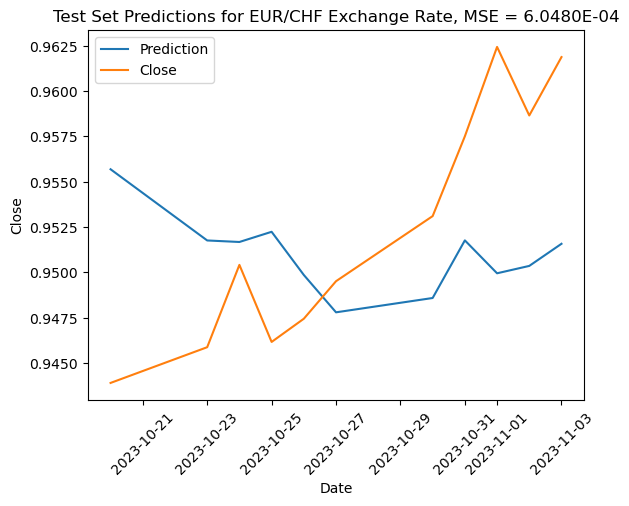

In [44]:
alphas = 10.0**np.arange(-5,6)
eur_chf_MSEs = ridge_regression_grid_search(eur_chf_datasets_select[0], eur_chf_datasets_select[2], alphas)
min_ind = np.argmin(eur_chf_MSEs)
print(f"Minimum CV MSE = {eur_chf_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
eur_chf_forecast_vals_select = ridge_regression_results_and_forecast(eur_chf_datasets_select[0], eur_chf_datasets_select[2], eur_chf_datasets_select[1], eur_chf_datasets_select[3], eur_chf_datasets_select[4], alphas[min_ind], "EUR/CHF")

Minimum CV MSE = 9.320873364695569e-05, best alpha = 1e-05


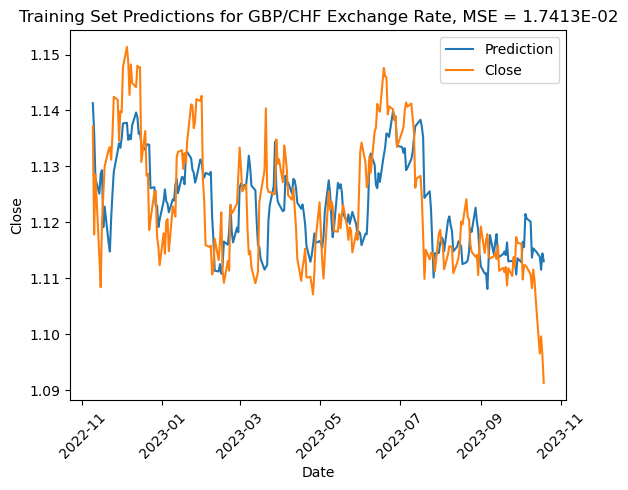

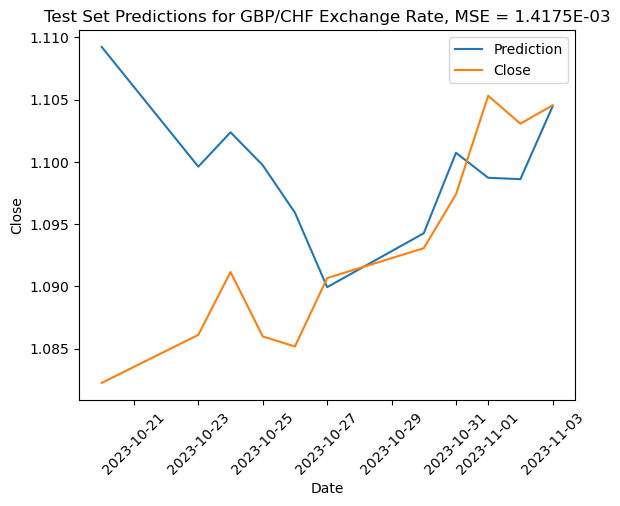

In [45]:
alphas = 10.0**np.arange(-5,6)
gbp_chf_MSEs = ridge_regression_grid_search(gbp_chf_datasets_select[0], gbp_chf_datasets_select[2], alphas)
min_ind = np.argmin(gbp_chf_MSEs)
print(f"Minimum CV MSE = {gbp_chf_MSEs[min_ind]}, best alpha = {alphas[min_ind]}")
gbp_chf_forecast_vals_select = ridge_regression_results_and_forecast(gbp_chf_datasets_select[0], gbp_chf_datasets_select[2], gbp_chf_datasets_select[1], gbp_chf_datasets_select[3], gbp_chf_datasets_select[4], alphas[min_ind], "GBP/CHF")

In [46]:
forecast_vals_select = usd_eur_forecast_vals_select.merge(eur_chf_forecast_vals_select, how='inner', on='Date')
lst = [eur_gbp_forecast_vals_select, gbp_chf_forecast_vals_select, usd_chf_forecast_vals_select, usd_gbp_forecast_vals_select]
for vals in lst:
    forecast_vals_select = forecast_vals_select.merge(vals, how='inner', on='Date')

forecast_vals_select

,Date,Predicted_Close_USD/EUR,Predicted_Close_EUR/CHF,Predicted_Close_EUR/GBP,Predicted_Close_GBP/CHF,Predicted_Close_USD/CHF,Predicted_Close_USD/GBP
0,2023-11-10,0.938317,0.960966,0.870444,1.117944,0.908574,0.817485
1,2023-11-09,0.939666,0.958797,0.869251,1.117829,0.908056,0.818025
2,2023-11-08,0.940063,0.959733,0.870486,1.119227,0.909492,0.819210
3,2023-11-07,0.938848,0.957029,0.871622,1.111440,0.905397,0.818948
4,2023-11-06,0.940880,0.954357,0.871233,1.107006,0.905086,0.820754
